## Import Library

In [221]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd

## Columns we want

In [222]:
Team_Name = []
Year = []
Wins = []
Losses = []
OT_Losses = []
Win_percent = []
Goals_For = []
Goals_Against = []
Goal_Difference = []

## Scraping using BeautifulSoup

In [223]:

for dt in range(1,13):
    url = 'https://www.scrapethissite.com/pages/forms/?page_num='+str(dt)+ '&per_page=50'
    
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html') 
    box = soup.find('table',class_='table')
    
    names = box.find_all("td", class_= 'name')
    for i in names:
        nm = i.text.strip()
        Team_Name.append(nm)
        
    years = box.find_all('td', class_='year')
    for y in years:
        yr = y.text.strip()
        Year.append(yr)
        
    wins = box.find_all('td',class_='wins')
    for w in wins:
        wn = w.text.strip()
        Wins.append(wn)
        
    loss = box.find_all('td',class_='losses')
    for l in loss:
        ls = l.text.strip()
        Losses.append(ls)
        
    ot_loss = box.find_all('td',class_='ot-losses')
    for ol in ot_loss:
        ols = ol.text.strip()
        OT_Losses.append(ols)
        
    win_percent = box.find_all('td',class_='pct text-success')
    for wp in win_percent:
        wpr = wp.text.strip()
        Win_percent.append(wpr)
        
    goals_for = box.find_all('td',class_='gf')
    for gf in goals_for:
        gfr = gf.text.strip()
        Goals_For.append(gfr)
        
    goals_against = box.find_all('td',class_='ga')
    for ga in goals_against:
        gat = ga.text.strip()
        Goals_Against.append(gat)
        
    goal_difference = box.find_all('td',class_='diff text-success')
    for gd in goal_difference:
        gde = gd.text.strip()
        Goal_Difference.append(gde)



## Check Column length

In [224]:
print("Team_Name:", len(Team_Name))
print("Year:", len(Year))
print("Wins:", len(Wins))
print("Losses:", len(Losses))
print("OT_Losses:", len(OT_Losses))
print("Win_percent:", len(Win_percent))
print("Goals_For:", len(Goals_For))
print("Goals_Against:", len(Goals_Against))
print("Goal_Difference:", len(Goal_Difference))


Team_Name: 582
Year: 582
Wins: 582
Losses: 582
OT_Losses: 582
Win_percent: 232
Goals_For: 582
Goals_Against: 582
Goal_Difference: 319


## Handle length issue

In [225]:
# Add None or 'N/A' to lists that are shorter
while len(Win_percent) < len(Team_Name):
    Win_percent.append('N/A')

while len(Goal_Difference) < len(Team_Name):
    Goal_Difference.append('N/A')


In [226]:
print("Team_Name:", len(Team_Name))
print("Year:", len(Year))
print("Wins:", len(Wins))
print("Losses:", len(Losses))
print("OT_Losses:", len(OT_Losses))
print("Win_percent:", len(Win_percent))
print("Goals_For:", len(Goals_For))
print("Goals_Against:", len(Goals_Against))
print("Goal_Difference:", len(Goal_Difference))

Team_Name: 582
Year: 582
Wins: 582
Losses: 582
OT_Losses: 582
Win_percent: 582
Goals_For: 582
Goals_Against: 582
Goal_Difference: 582


## Convert into data frame

In [242]:
df = pd.DataFrame({'Team Name':Team_Name, 'Year':Year, 'Wins':Wins, 'Losses':Losses, 'OT Losses':OT_Losses, 'Win %':Win_percent, 'Goals For (GF)':Goals_For, 'Goals Against (GA)':Goals_Against, 'Goal Difference':Goal_Difference})
df 

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),Goal Difference
0,Boston Bruins,1990,44,24,,0.55,299,264,35
1,Buffalo Sabres,1990,31,30,,0.575,292,278,14
2,Calgary Flames,1990,46,26,,0.613,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.575,284,211,73
4,Detroit Red Wings,1990,34,38,,0.512,273,298,0
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,N/A,235,281,N/A
578,Toronto Maple Leafs,2011,35,37,10,N/A,231,264,N/A
579,Vancouver Canucks,2011,51,22,9,N/A,249,198,N/A
580,Washington Capitals,2011,42,32,8,N/A,222,230,N/A


In [244]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 
df['Wins'] = pd.to_numeric(df['Wins'], errors='coerce')
df['Losses'] = pd.to_numeric(df['Losses'], errors='coerce')
df['OT Losses'] = pd.to_numeric(df['OT Losses'], errors='coerce')
df['Win %']	= pd.to_numeric(df['Win %'], errors='coerce')
df['Goals For (GF)'] = pd.to_numeric(df['Goals For (GF)'], errors='coerce')
df['Goals Against (GA)'] = pd.to_numeric(df['Goals Against (GA)'], errors='coerce')
df['Goal Difference'] = pd.to_numeric(df['Goal Difference'], errors='coerce')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           582 non-null    object 
 1   Year                582 non-null    int64  
 2   Wins                582 non-null    int64  
 3   Losses              582 non-null    int64  
 4   OT Losses           358 non-null    float64
 5   Win %               232 non-null    float64
 6   Goals For (GF)      582 non-null    int64  
 7   Goals Against (GA)  582 non-null    int64  
 8   Goal Difference     319 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 41.1+ KB


## Handle missing value 

In [246]:
df.fillna(0, inplace=True)
df['OT Losses'] = df['OT Losses'].astype(int)
#df['Goal Difference'] = df['Goal Difference'].astype(int)


In [247]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),Goal Difference
0,Boston Bruins,1990,44,24,0,0.550,299,264,35.0
1,Buffalo Sabres,1990,31,30,0,0.575,292,278,14.0
2,Calgary Flames,1990,46,26,0,0.613,344,263,81.0
3,Chicago Blackhawks,1990,49,23,0,0.575,284,211,73.0
4,Detroit Red Wings,1990,34,38,0,0.512,273,298,0.0
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.000,235,281,0.0
578,Toronto Maple Leafs,2011,35,37,10,0.000,231,264,0.0
579,Vancouver Canucks,2011,51,22,9,0.000,249,198,0.0
580,Washington Capitals,2011,42,32,8,0.000,222,230,0.0


In [248]:
df.loc[df['Win %'] == 0, 'Win %'] = df['Wins'] / (df['Wins'] + df['Losses'] + df['OT Losses']).round(2)

df['Win %'].fillna(0, inplace=True)

df['Win %'] = df['Win %'].round(2)


In [249]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),Goal Difference
0,Boston Bruins,1990,44,24,0,0.55,299,264,35.0
1,Buffalo Sabres,1990,31,30,0,0.57,292,278,14.0
2,Calgary Flames,1990,46,26,0,0.61,344,263,81.0
3,Chicago Blackhawks,1990,49,23,0,0.57,284,211,73.0
4,Detroit Red Wings,1990,34,38,0,0.51,273,298,0.0
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.46,235,281,0.0
578,Toronto Maple Leafs,2011,35,37,10,0.43,231,264,0.0
579,Vancouver Canucks,2011,51,22,9,0.62,249,198,0.0
580,Washington Capitals,2011,42,32,8,0.51,222,230,0.0


In [250]:
df.loc[df['Goal Difference'] == 0, 'Goal Difference'] = df['Goals For (GF)'] - df['Goals Against (GA)']		

In [251]:
df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),Goal Difference
0,Boston Bruins,1990,44,24,0,0.55,299,264,35.0
1,Buffalo Sabres,1990,31,30,0,0.57,292,278,14.0
2,Calgary Flames,1990,46,26,0,0.61,344,263,81.0
3,Chicago Blackhawks,1990,49,23,0,0.57,284,211,73.0
4,Detroit Red Wings,1990,34,38,0,0.51,273,298,-25.0
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8,0.46,235,281,-46.0
578,Toronto Maple Leafs,2011,35,37,10,0.43,231,264,-33.0
579,Vancouver Canucks,2011,51,22,9,0.62,249,198,51.0
580,Washington Capitals,2011,42,32,8,0.51,222,230,-8.0


## Convert into CSV file

In [252]:
df.to_csv('hockey_team.csv')

## Visualization

In [257]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\SONU\AppData\Local\Temp\ipykernel_16924\3835339364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Team Name', x='Wins', data=team_win, palette='viridis')


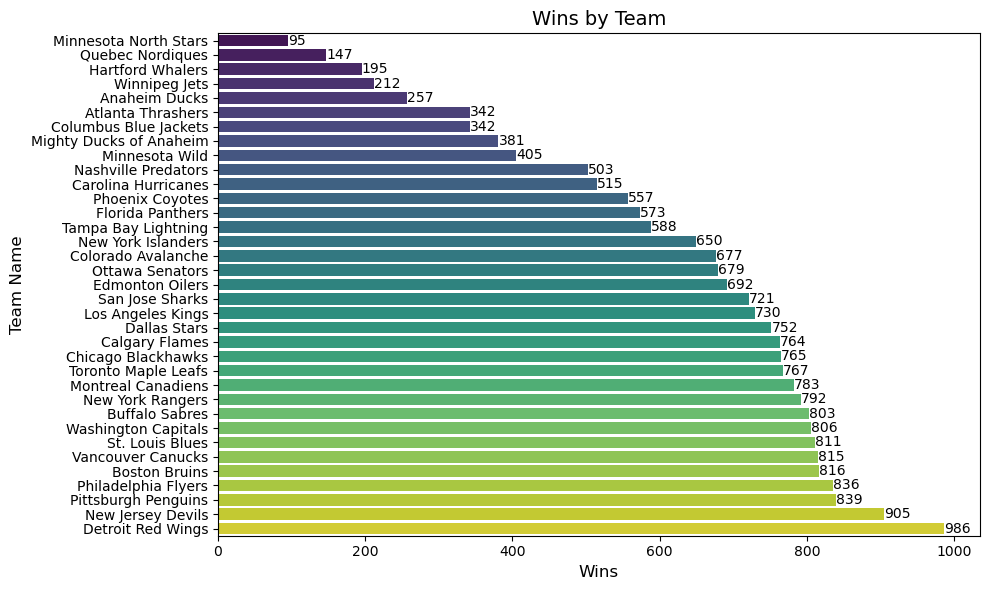

In [308]:
team_win = df.groupby('Team Name')['Wins'].sum().reset_index()
team_win = team_win.sort_values(by = 'Wins', ascending = True)
# Create a bar plot to compare Wins across different teams
plt.figure(figsize=(10, 6))
sns.barplot(y='Team Name', x='Wins', data=team_win, palette='viridis')

for index, value in enumerate(team_win['Wins']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='left', color='black')

plt.xlabel('Wins', fontsize=12)
plt.ylabel('Team Name', fontsize=12)
plt.title('Wins by Team', fontsize=14)
plt.tight_layout()
plt.show()


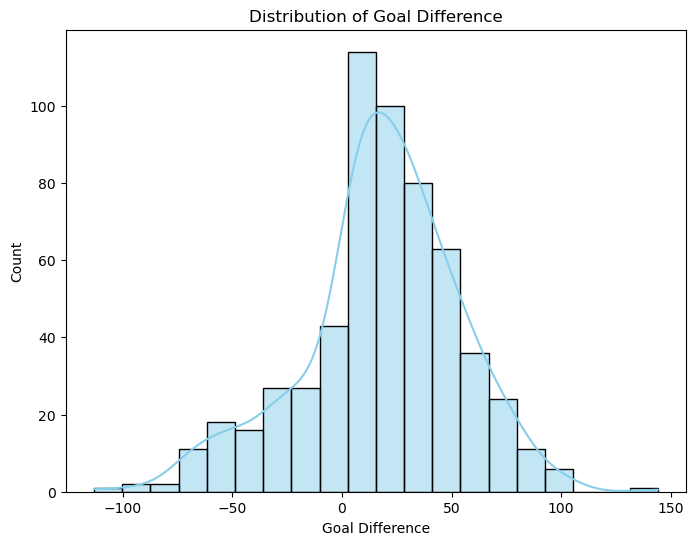

In [309]:
# Histogram for Goal Difference
plt.figure(figsize=(8, 6))
sns.histplot(df['Goal Difference'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Goal Difference')
plt.xlabel('Goal Difference')
plt.show()


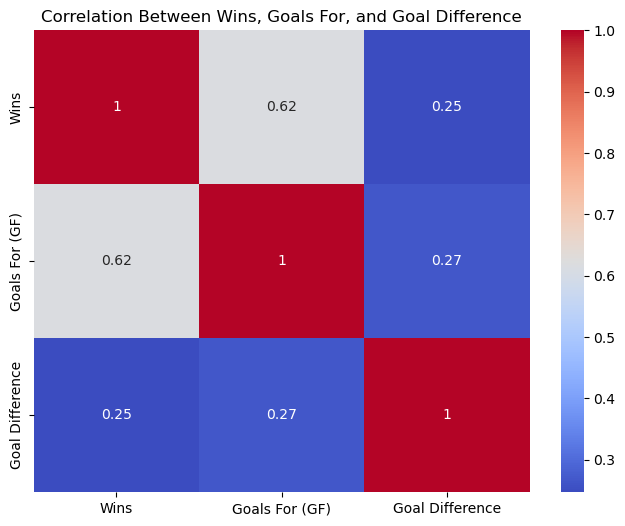

In [310]:
# Compute correlation and plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Wins', 'Goals For (GF)', 'Goal Difference']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Wins, Goals For, and Goal Difference')
plt.show()
